In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

from mlxtend.plotting import plot_confusion_matrix
import scikitplot as skplt
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("preprocessing-final.xlsx")
df = pd.DataFrame(data)
df.drop(df.columns[[0, 1, 2, 3, 4, 6]], axis=1, inplace=True)
df = df.dropna()
df['Label'].mask(df['Label'] == 0, "0 - Netral", inplace=True)
df['Label'].mask(df['Label'] == 1, "1 - Positif", inplace=True)
df['Label'].mask(df['Label'] == 2, "2 - Negatif", inplace=True)
df

,Stemmed Text,Label
0,mohon maaf tidak cantum masalah tuju lapor dug...,0 - Netral
1,tindaklanjuti tulis aksi ubah komplain jam dir...,2 - Negatif
2,admin listrik rumah coba hubung pln dekat tida...,0 - Netral
3,halo admin cek dm,0 - Netral
4,mudah mudah jam depan tidak madam,0 - Netral
...,...,...
151,daerah balekambang kramat jati jakarta timur p...,0 - Netral
152,va masuk r daya va alami naik tidak,0 - Netral
153,assalamualaikum listrik nyala daerah balekamba...,2 - Negatif
154,listrik area salam magelang mati an pagi siang...,2 - Negatif


In [3]:
vectorizer = TfidfVectorizer()
model_g = GaussianNB()

In [12]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df["Stemmed Text"].values.astype('U'))

print(vectors)


  (0, 273)	0.2262615336328142
  (0, 476)	0.2262615336328142
  (0, 419)	0.1503968242347636
  (0, 122)	0.2262615336328142
  (0, 199)	0.2262615336328142
  (0, 322)	0.2262615336328142
  (0, 265)	0.17321842143958738
  (0, 346)	0.17974530003543218
  (0, 502)	0.17321842143958738
  (0, 194)	0.16257754223871876
  (0, 77)	0.20909377583610078
  (0, 79)	0.1503968242347636
  (0, 417)	0.17321842143958738
  (0, 37)	0.20909377583610078
  (0, 407)	0.20909377583610078
  (0, 368)	0.20909377583610078
  (0, 195)	0.17321842143958738
  (0, 283)	0.08086342310566343
  (0, 93)	0.2262615336328142
  (0, 129)	0.20909377583610078
  (0, 275)	0.15811648312911994
  (0, 519)	0.2262615336328142
  (0, 315)	0.2262615336328142
  (0, 80)	0.2262615336328142
  (0, 499)	0.10756473069245631
  :	:
  (150, 227)	0.14842339025250262
  (150, 492)	0.14842339025250262
  (150, 502)	0.19297339575823727
  (150, 194)	0.18111896032244865
  (150, 283)	0.09008562264711138
  (150, 332)	0.15111953758917837
  (151, 20)	0.3638706633420465
  (151

In [128]:
X_train, X_test, y_train, y_test = train_test_split(dense, df["Label"], test_size=0.3)


In [129]:
print("Data Training : ", y_train.shape)
print("Data Testing : ", y_test.shape)

Data Training :  (107,)
Data Testing :  (46,)


In [130]:
model_g.fit(X_train,y_train)

GaussianNB()

[[25  0  1]
 [ 1  1  0]
 [ 9  2  7]]
              precision    recall  f1-score   support

  0 - Netral       0.71      0.96      0.82        26
 1 - Positif       0.33      0.50      0.40         2
 2 - Negatif       0.88      0.39      0.54        18

    accuracy                           0.72        46
   macro avg       0.64      0.62      0.59        46
weighted avg       0.76      0.72      0.69        46

nilai akurasinya adalah  0.717391304347826


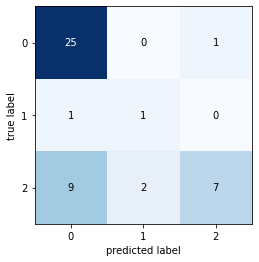

In [131]:
expected = y_test
predicted = model_g.predict(X_test)

print(confusion_matrix(expected, predicted))
plot_confusion_matrix(confusion_matrix(expected, predicted))
print(classification_report(expected,predicted))
print('nilai akurasinya adalah ', accuracy_score(expected, predicted))

In [91]:
tweet = '@pln_123 halo pln kenapa ini mati listrik, lokasi setro baru utara tambaksari surabaya?'
v_data = vectorizer.transform([tweet]).toarray()
y_preds = model_g.predict(v_data)

print(y_preds)

['0 - Netral']
